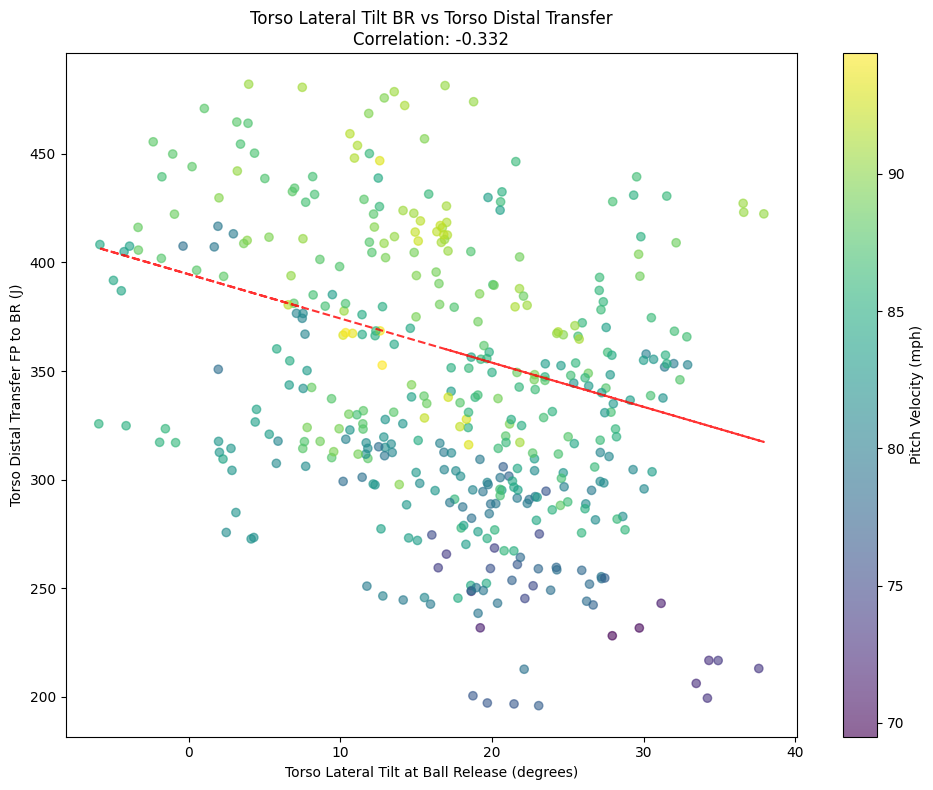

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('pitching_poi_metrics.csv')

# Create scatter plot
plt.figure(figsize=(10, 8))

# Create scatter plot with color based on pitch velocity
scatter = plt.scatter(df['torso_lateral_tilt_br'], 
                     df['elbow_transfer_fp_br'],
                     c=df['pitch_speed_mph'],
                     cmap='viridis',
                     alpha=0.6)

# Add trend line
z = np.polyfit(df['torso_lateral_tilt_br'], df['thorax_distal_transfer_fp_br'], 1)
p = np.poly1d(z)
plt.plot(df['torso_lateral_tilt_br'], p(df['torso_lateral_tilt_br']), "r--", alpha=0.8)

# Calculate correlation coefficient
corr = df['torso_lateral_tilt_br'].corr(df['elbow_transfer_fp_br'])

# Add labels and title
plt.xlabel('Torso Lateral Tilt at Ball Release (degrees)')
plt.ylabel('Torso Distal Transfer FP to BR (J)')
plt.title(f'Torso Lateral Tilt BR vs Torso Distal Transfer\nCorrelation: {corr:.3f}')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Pitch Velocity (mph)')

plt.tight_layout()
plt.show()